# Run this Notebook

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DeepRLCourse/Homework-1-Questions/blob/main/HW1_Notebook.ipynb)  
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/DeepRLCourse/Homework-1-Questions/blob/main/HW1_Notebook.ipynb)

# HW1: Introduction to RL
> - Full Name: **Ali Najar**
> - Student ID: **401102701**


This notebook is designed to provide hands-on experience with RL modeling, algorithm implementation, and performance evaluation. Students will explore RL concepts through predefined environments and custom-designed settings.

Follow the instructions in each section to complete the homework.

## Setup Instructions
Seting up RL dependecies for first time may be challenging. Some  torch or gymnasium (Sklearn lib in SL world!) environments need additional set up on your system. If you encountered error and failure after hours of search and try, feel free to be in contact with TA's.  Run the following commands to install dependencies before starting the notebook:



In [ ]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!apt-get install xvfb

In [ ]:
!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install swig
!pip install stable-baselines3 "gymnasium[all]" pygame matplotlib numpy pandas

Hamid is CE student who loves learning about RL. He tried to use **Gymnasium** and **Stable-Baselines3** to solve games he played as a kid.  

He started to list the games which was provided in gymnasium library.

In [ ]:
from gymnasium import envs

all_envs = envs.registry
env_ids = [env_spec  for env_spec in all_envs]
print("Gymnasium envs listed:",sorted(env_ids))

Then He selected Mountain Car Game to work with:

In [ ]:
import gymnasium as gym
env = gym.make("MountainCar-v0", render_mode="rgb_array", goal_velocity=0.1)

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

print("Action Example: {}".format(env.action_space.sample()))
print("State Example: {}".format(env.observation_space.sample()))

Hamid wanted to visualize the env for better understandig of gym envs. He had two options:


1.   rendering inside the colab
2.   rendering as video file



For ploting the game **inside** the colab he used **pyvirtualdisplay** package:

In [ ]:
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

display = Display(visible=0, size=(400, 300))
display.start()

So He started modify the code to learn how action works and plot it. He selected action of

 *`2: Accelerate to the right`*

For every state of car.

In [ ]:
env.reset()
prev_screen = env.render( )
plt.imshow(prev_screen)

for i in range(40):
  # action = env.action_space.sample()  # Random action
  action = 2 # Action Hamid modified to practice
  obs, reward,terminated, truncated, info = env.step(action)
  screen = env.render()

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if terminated:
    break

ipythondisplay.clear_output(wait=True)
env.close()

But for saving game as **video** he defined a function (it's okay if you don't understand just try to run the code and see the output, then try to modify envs!):

In [ ]:
import logging
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

training_period = 250  # record the agent's episode every 250
num_training_episodes = 1000  # total number of training episodes

env = gym.make("MountainCar-v0", render_mode="rgb_array")
env = RecordVideo(env, video_folder="MountainCar-v0-agent", name_prefix="training",
                  episode_trigger=lambda x: x % training_period == 0)
env = RecordEpisodeStatistics(env)

for episode_num in range(num_training_episodes):
    obs, info = env.reset()

    episode_over = False
    while not episode_over:
        action = env.action_space.sample()  # replace with actual agent
        obs, reward, terminated, truncated, info = env.step(action)

        episode_over = terminated or truncated

    logging.info(f"episode-{episode_num}", info["episode"])
env.close()

The videos are in MountainCar-v0-agent folder of your colab folder.

But the car couldn't reach the goal state on top of the right hill. So he tried to implement RL algorithm for learning it

In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Parallel environments can bet set but Hamid set 1 env
vec_env = make_vec_env("MountainCar-v0", n_envs=1)

model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=25000)
model.save("ppo_MountainCar")

del model # remove to demonstrate saving and loading


**Loading saved model**

After training model using PPO and saving it, Hamid started to load the model with the name he saved in cell above:

In [ ]:
model = PPO.load("ppo_MountainCar")

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    print(obs, rewards, dones, info)
    if dones[0]:
      break

# **Task 1: Solving Predefined Environments (45 points)**
1.1. Choose two environments from the list which are implemented by  other developers and communities and train RL agents using stable-baselines3. Don't forget to check workshop notebook.

**Environments:**
- [CartPole](https://gymnasium.farama.org/environments/classic_control/cart_pole/)
- [FrozenLake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)
- [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/)
- Flappy Bird (Custom env which you can google it)

📊 1.2. Algorithm Comparison:


 Compare RL algorithms and results (at least two algorithms e.g., PPO, DQN) based on:
- Total reward over time
- Hyperparameters (check the docs)


Env1 implementation. [ place for your code ]




In [ ]:
from stable_baselines3 import PPO, DQN
# Import env 1
env_frozenlake = gym.make('FrozenLake-v1', is_slippery=False)  # Slippery=False for deterministic behavior
# Define hyperparameter sets
ppo_hyperparams = [
    ({"learning_rate": 1e-4, "gamma": 0.99}, {"timesteps": 50000}),
    ({"learning_rate": 1e-2, "gamma": 0.99}, {"timesteps": 50000}),
    ({"learning_rate": 1e-4, "gamma": 0.7}, {"timesteps": 50000}),
    ({"learning_rate": 1e-4, "gamma": 0.99}, {"timesteps": 5000})
]

dqn_hyperparams = [
    {"learning_rate": 1e-4, "gamma": 0.99, "buffer_size": 1000000},
    {"learning_rate": 1e-2, "gamma": 0.99, "buffer_size": 1000000},
    {"learning_rate": 1e-4, "gamma": 0.7, "buffer_size": 1000000},
    {"learning_rate": 1e-4, "gamma": 0.99, "buffer_size": 100000}
]
# Train env 1
def train_agent(env, algorithm, params, timesteps=100000, log_dir="./Frozen_Lake/"):
    if algorithm == 'PPO':
        model = PPO('MlpPolicy', env, verbose=0, tensorboard_log=log_dir, **params)
    elif algorithm == 'DQN':
        model = DQN('MlpPolicy', env, verbose=0, tensorboard_log=log_dir, **params)

    model.learn(total_timesteps=timesteps,progress_bar = False)
    return model

ppo_models = []
for params,timesteps in ppo_hyperparams:
    print(f"\nTraining PPO with hyperparams: {params}")
    model = train_agent(env_frozenlake, 'PPO', params,timesteps=timesteps['timesteps'], log_dir="./Frozen_Lake/")

# Train DQN with multiple hyperparameters
dqn_models = []
for params in dqn_hyperparams:
    print(f"\nTraining DQN with hyperparams: {params}")
    model = train_agent(env_frozenlake, 'DQN', params, log_dir="./Frozen_Lake/")


In [ ]:
# Bonus TODO's: Your wrapper for reward function
class RewardWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)

    def reward(self, reward):
        # Modify the reward here (e.g., scale it or add some noise)
        if reward == 0:
          return -0.1
        return reward   # Example: simple scaling
env = RewardWrapper(env_frozenlake)
model = PPO('MlpPolicy', env, verbose=0, tensorboard_log="./Frozen_Lake/", gamma=0.99,learning_rate=1e-4)
model.learn(total_timesteps=50000,progress_bar=False)
model = DQN('MlpPolicy', env, verbose=0, tensorboard_log="./Frozen_Lake/", gamma=0.99,learning_rate=1e-4,buffer_size=1000000)
model.learn(total_timesteps=100000,progress_bar=False)


In [ ]:
%load_ext tensorboard

In [ ]:
tensorboard --logdir ./Frozen_Lake/

Env2 implementation. [ place for your code ]

In [ ]:
from stable_baselines3 import PPO, DQN
# Import env 1
env_cartpole = gym.make('CartPole-v1')
# Define hyperparameter sets
ppo_hyperparams = [
    ({"learning_rate": 1e-3, "gamma": 0.99}, {"timesteps": 100000}),
    ({"learning_rate": 1e-1, "gamma": 0.99}, {"timesteps": 100000}),
    ({"learning_rate": 1e-3, "gamma": 0.7}, {"timesteps": 100000}),
    ({"learning_rate": 1e-3, "gamma": 0.99}, {"timesteps": 20000})
]

dqn_hyperparams = [
    {"learning_rate": 1e-3, "gamma": 0.99, "buffer_size": 1000000},
    {"learning_rate": 1e-1, "gamma": 0.99, "buffer_size": 1000000},
    {"learning_rate": 1e-3, "gamma": 0.7, "buffer_size": 1000000},
    {"learning_rate": 1e-3, "gamma": 0.99, "buffer_size": 100000}
]
# Train env 1
def train_agent(env, algorithm, params, timesteps=100000, log_dir="./Cartpole/"):
    if algorithm == 'PPO':
        model = PPO('MlpPolicy', env, verbose=0, tensorboard_log=log_dir, **params)
    elif algorithm == 'DQN':
        model = DQN('MlpPolicy', env, verbose=0, tensorboard_log=log_dir, **params)

    model.learn(total_timesteps=timesteps,progress_bar = False)
    return model

ppo_models = []
for params,timesteps in ppo_hyperparams:
    print(f"\nTraining PPO with hyperparams: {params}")
    model = train_agent(env_cartpole, 'PPO', params,timesteps=timesteps['timesteps'], log_dir="./Cartpole/")

# Train DQN with multiple hyperparameters
dqn_models = []
for params in dqn_hyperparams:
    print(f"\nTraining DQN with hyperparams: {params}")
    model = train_agent(env_cartpole, 'DQN', params, log_dir="./Cartpole/")


Write a wrapper for changing reward function and plot the changes. (Bonus)

In [ ]:
# Bonus TODO's: Your wrapper for reward function
class RewardWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)

    def reward(self, reward):
        # Modify the reward here (e.g., scale it or add some noise)
        return reward * 10   # Example: simple scaling
env = RewardWrapper(env_cartpole)
model = PPO('MlpPolicy', env, verbose=0, tensorboard_log="./Cartpole/", gamma=0.99,learning_rate=1e-4)
model.learn(total_timesteps=100000,progress_bar=False)
model = DQN('MlpPolicy', env, verbose=0, tensorboard_log="./Cartpole/", gamma=0.99,learning_rate=1e-4,buffer_size=1000000)
model.learn(total_timesteps=100000,progress_bar=False)


In [ ]:
%load_ext tensorboard

In [ ]:
tensorboard --logdir ./Cartpole/

# **Task 2: Creating Custom Environment (45 points)**
In this question, you are required to model **a custom 4*4 gridworld problem** as Markov Decision Processes (MDPs). You must define the following components:

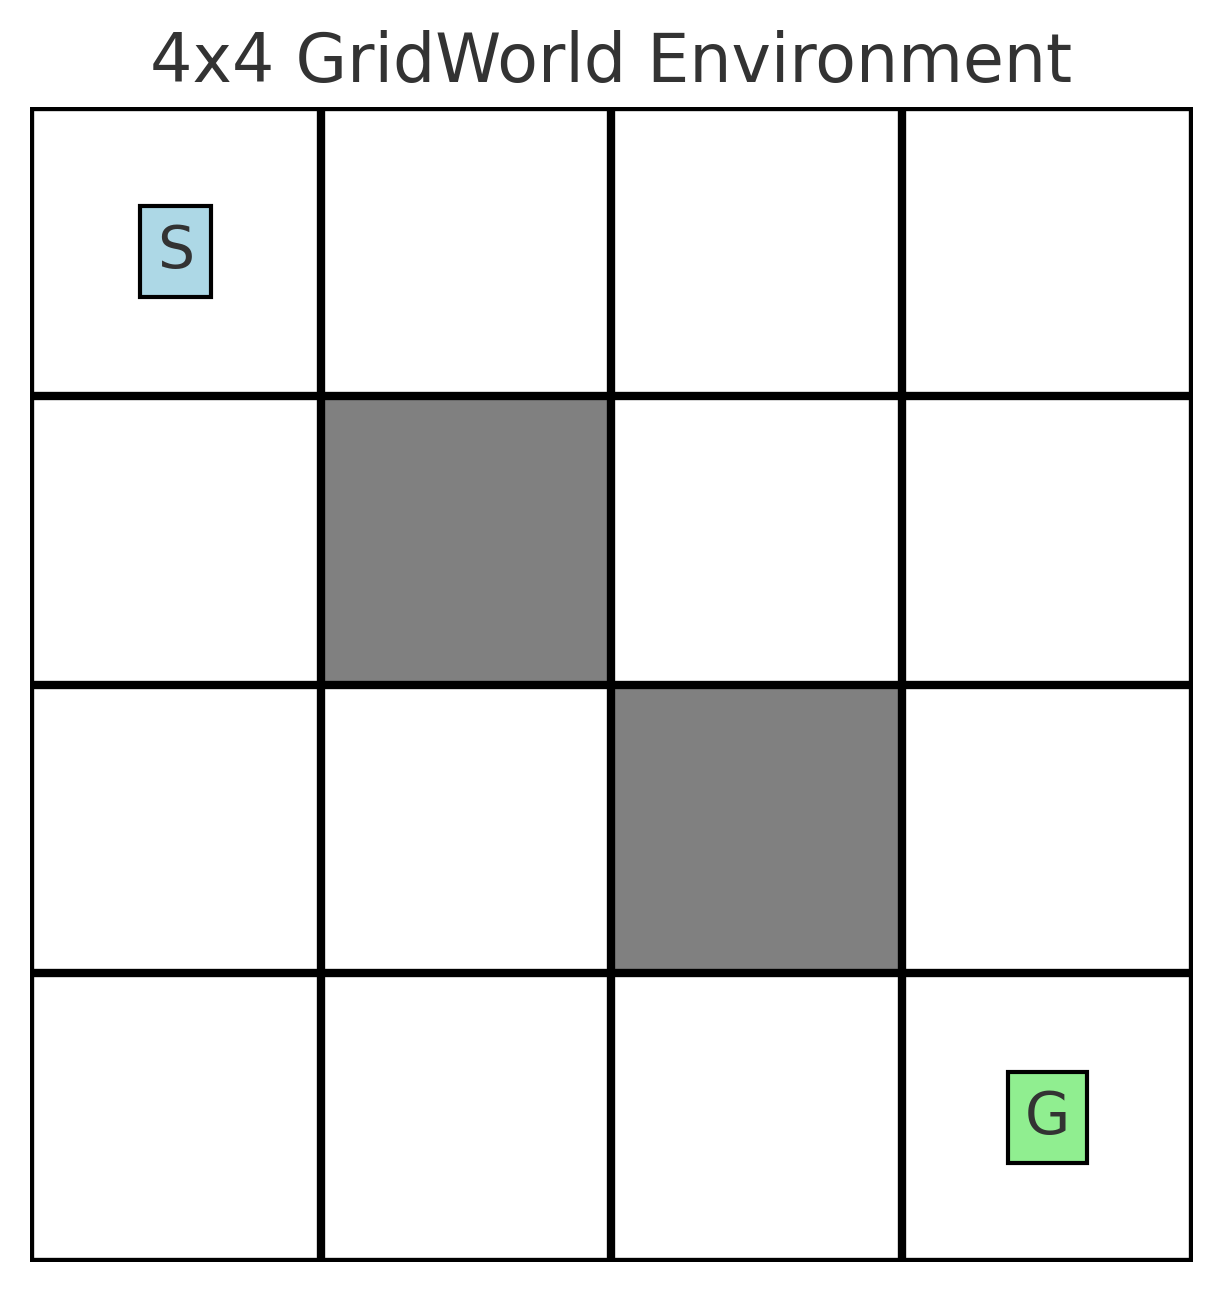

- **State Space ($ S $)**: The set of all possible states the agent can be in.
- **Action Space ($ A $)**: The set of all possible actions the agent can take.
- **Reward Function ($ R $)**: The reward the agent receives for taking an action in a given state.
- **Transition Probability ($ P $)**: The probability of transitioning to a new state given the current state and action. If the environment is deterministic, this can be omitted.

After defining the MDP components, implement problem using the **Gymnasium standard API**. Then, test the environments using various reinforcement learning algorithms (e.g., Q-Learning, DQN, PPO) and evaluate their performance.

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class FourByFourGridEnv(gym.Env):
    def __init__(self):
        super().__init__()

        # Define action and observation (state) spaces
        self.action_space = spaces.Discrete(4)  # Up, Right, Down, Left
        # We'll keep an internal (row, col), but let's define a discrete space for 16 states
        self.observation_space = spaces.Discrete(16)

        # Grid dimensions
        self.grid_size = 4

        # Start and goal
        self.start_state = (0, 0)
        self.goal_state = (3, 3)

        self.obstacles = {(1,1), (1,2),(2,2)}


        # Current state
        self.current_state = None

    def _coords_to_state(self, row, col):
        return row * self.grid_size + col

    def _state_to_coords(self, s):
        row = s // self.grid_size
        col = s % self.grid_size
        return (row, col)

    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed)

        # Reset the agent to the start state
        self.current_state = self.start_state

        # Return the observation (as an integer) and info
        obs = self._coords_to_state(*self.current_state)
        info = {}
        return obs, info

    def step(self, action):
        row, col = self.current_state

        # Apply the action
        if action == 0:  # Up
            next_row = max(row - 1, 0)
            next_col = col
        elif action == 1:  # Right
            next_row = row
            next_col = min(col + 1, self.grid_size - 1)
        elif action == 2:  # Down
            next_row = min(row + 1, self.grid_size - 1)
            next_col = col
        elif action == 3:  # Left
            next_row = row
            next_col = max(col - 1, 0)
        else:
            raise ValueError("Invalid action!")

        # Check if the next cell is an obstacle
        if (next_row, next_col) in self.obstacles:
            next_row, next_col = row, col

        next_state = (next_row, next_col)
        self.current_state = next_state

        # Compute reward
        if next_state == self.goal_state:
            reward = 20.0
            done = True
        else:
            reward = -1
            done = False

        obs = self._coords_to_state(*self.current_state)
        truncated = False  # Not using time-limit truncation here
        info = {}

        return obs, reward, done, truncated, info

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=str)
        grid[:] = '.'

        # Mark obstacles
        for (r, c) in self.obstacles:
            grid[r, c] = "X"

        # Mark Start
        sr, sc = self.start_state
        grid[sr, sc] = "S"

        # Mark the goal
        gr, gc = self.goal_state
        grid[gr, gc] = 'G'

        # Mark the agent
        row, col = self.current_state
        grid[row, col] = 'A'


        for r in range(self.grid_size):
            print(' '.join(grid[r]))
        print()

    def close(self):
        super().close()


In [ ]:
from stable_baselines3.common.env_util import make_vec_env


vec_env = make_vec_env(FourByFourGridEnv, n_envs=1)


In [ ]:
from stable_baselines3 import PPO, DQN
ppo_hyperparams = [
    ({"learning_rate": 1e-3, "gamma": 0.99}, {"timesteps": 30000}),
    ({"learning_rate": 1e-1, "gamma": 0.99}, {"timesteps": 30000}),
    ({"learning_rate": 1e-3, "gamma": 0.7}, {"timesteps": 30000}),
    ({"learning_rate": 1e-3, "gamma": 0.99}, {"timesteps": 3000})
]

dqn_hyperparams = [
    {"learning_rate": 1e-3, "gamma": 0.99, "buffer_size": 1000000},
    {"learning_rate": 1e-1, "gamma": 0.99, "buffer_size": 1000000},
    {"learning_rate": 1e-3, "gamma": 0.7, "buffer_size": 1000000},
    {"learning_rate": 1e-3, "gamma": 0.99, "buffer_size": 100000}
]
def train_agent(env, algorithm, params, timesteps=30000, log_dir="./Grid/"):
    if algorithm == 'PPO':
        model = PPO('MlpPolicy', env, verbose=0, tensorboard_log=log_dir, **params)
    elif algorithm == 'DQN':
        model = DQN('MlpPolicy', env, verbose=0, tensorboard_log=log_dir, **params)

    model.learn(total_timesteps=timesteps,progress_bar = False)
    return model

ppo_models = []
for params,timesteps in ppo_hyperparams:
    print(f"\nTraining PPO with hyperparams: {params}")
    model = train_agent(vec_env, 'PPO', params,timesteps=timesteps['timesteps'], log_dir="./Grid/")

# Train DQN with multiple hyperparameters
dqn_models = []
for params in dqn_hyperparams:
    print(f"\nTraining DQN with hyperparams: {params}")
    model = train_agent(vec_env, 'DQN', params, log_dir="./Grid/")

📊 Algorithm Comparison
Compare RL algorithms (e.g., PPO, DQN) based on:
- Total reward over time
- Sample efficiency
- Hyperparameters


In [ ]:
%load_ext tensorboard

In [ ]:
tensorboard --logdir ./Grid/

# **Task 3: Pygame 🎮 Tutorial & Custom RL Environment (Bonus)**

In this bonus task, you will implement a custom RL environment using Pygame and make it Gym-compatible for training an RL agent. Pygame is widely used for 2D game development and can be an excellent tool for creating custom RL environments. You will start by learning basic Pygame concepts (game loop, rendering, input handling), then implement a simple grid-based environment where an agent moves toward a goal while avoiding obstacles. Finally, you will train an RL agent using Stable-Baselines3 (SB3) to solve the environment. If you’re looking for inspiration, consider recreating the Chrome Dino game 🦖 as an RL environment which will be introduced at workshop or future TA sessions, but feel free to explore your own ideas!

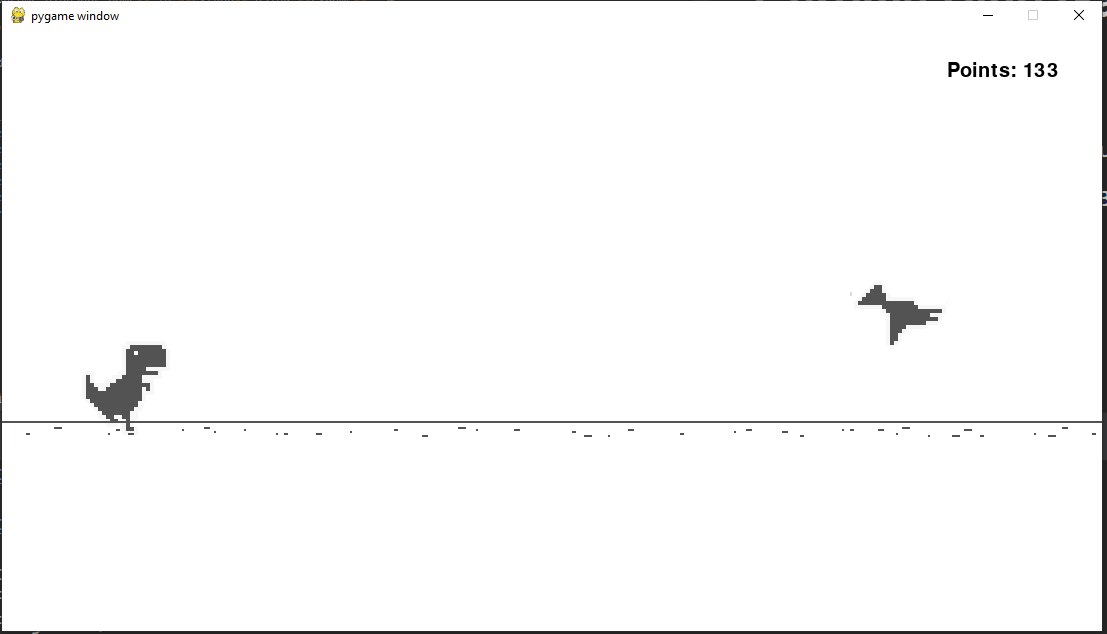

In [ ]:
import os
import pygame
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import random

class DinoGameEnv(gym.Env):
    """
    A Chrome Dino-like Gymnasium environment with full asset usage.
    """

    metadata = {"render_modes": ["human", "rgb_array"]}

    def __init__(self, render_mode="human", width=800, height=400, asset_path="assets"):
        super().__init__()

        self.render_mode = render_mode
        self.width = width
        self.height = height
        self.asset_path = asset_path

        # ---- Gymnasium Spaces (example: discrete actions, simple numeric observations) ----
        self.action_space = spaces.Discrete(3)  # 0=NoOp, 1=Jump, 2=Duck
        obs_low  = np.array([0, -20, 0], dtype=np.float32)
        obs_high = np.array([height,  20, 1000], dtype=np.float32)
        self.observation_space = spaces.Box(obs_low, obs_high, dtype=np.float32)

        # Initialize Pygame only if rendering
        if self.render_mode == "human":
            pygame.init()
            self.screen = pygame.display.set_mode((self.width, self.height))
            pygame.display.set_caption("Dino RL Environment")
            self.clock = pygame.time.Clock()

        # ---- LOAD ASSETS ----
        # Dino frames
        self.dino_run_imgs = [
            pygame.image.load(os.path.join(asset_path, "DinoRun1.png")).convert_alpha(),
            pygame.image.load(os.path.join(asset_path, "DinoRun2.png")).convert_alpha()
        ]
        self.dino_duck_imgs = [
            pygame.image.load(os.path.join(asset_path, "DinoDuck1.png")).convert_alpha(),
            pygame.image.load(os.path.join(asset_path, "DinoDuck2.png")).convert_alpha()
        ]
        self.dino_jump_img = pygame.image.load(os.path.join(asset_path, "DinoJump.png")).convert_alpha()
        self.dino_dead_img = pygame.image.load(os.path.join(asset_path, "DinoDead.png")).convert_alpha()
        self.dino_start_img = pygame.image.load(os.path.join(asset_path, "DinoStart.png")).convert_alpha()

        # Bird frames
        self.bird_imgs = [
            pygame.image.load(os.path.join(asset_path, "Bird1.png")).convert_alpha(),
            pygame.image.load(os.path.join(asset_path, "Bird2.png")).convert_alpha()
        ]

        # Cacti (small and large)
        self.small_cacti = [
            pygame.image.load(os.path.join(asset_path, "SmallCactus1.png")).convert_alpha(),
            pygame.image.load(os.path.join(asset_path, "SmallCactus2.png")).convert_alpha(),
            pygame.image.load(os.path.join(asset_path, "SmallCactus3.png")).convert_alpha()
        ]
        self.large_cacti = [
            pygame.image.load(os.path.join(asset_path, "LargeCactus1.png")).convert_alpha(),
            pygame.image.load(os.path.join(asset_path, "LargeCactus2.png")).convert_alpha(),
            pygame.image.load(os.path.join(asset_path, "LargeCactus3.png")).convert_alpha()
        ]

        # Other assets
        self.cloud_img = pygame.image.load(os.path.join(asset_path, "Cloud.png")).convert_alpha()
        self.game_over_img = pygame.image.load(os.path.join(asset_path, "GameOver.png")).convert_alpha()
        self.reset_img = pygame.image.load(os.path.join(asset_path, "Reset.png")).convert_alpha()
        self.track_img = pygame.image.load(os.path.join(asset_path, "Track.png")).convert_alpha()

        # Initialize game variables
        self._reset_game_vars()

    def _reset_game_vars(self):
        """
        Helper to reset state variables for a new episode.
        """
        self.dino_x = 50
        self.dino_y = self.height - 80
        self.dino_vel_y = 0
        self.gravity = 1
        self.is_jumping = False
        self.is_ducking = False
        self.run_anim_index = 0

        self.obstacles = []     # each item: ("type", current_img, rect, animation_index, ...?)
        self.obstacle_speed = 8
        self.spawn_timer = 0
        self.spawn_interval = 90

        self.clouds = []        # if you want scrolling clouds
        self.cloud_speed = 2

        self.score = 0
        self.num_steps = 0
        self.done = False

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self._reset_game_vars()

        # Return obs, info
        return self._get_obs(), {}

    def step(self, action):
        # Process action, update Dino, spawn obstacles, check collisions, etc.
        # Example skeleton:

        self.num_steps += 1

        # (1) Action logic (jump/duck/no-op)
        if action == 1 and not self.is_jumping:
            self.is_jumping = True
            self.dino_vel_y = -15
            self.is_ducking = False
        elif action == 2 and not self.is_jumping:
            self.is_ducking = True
        else:
            if self.is_ducking and action != 2:
                self.is_ducking = False

        # (2) Update Dino position (jump physics)
        if self.is_jumping:
            self.dino_y += self.dino_vel_y
            self.dino_vel_y += self.gravity
            if self.dino_y >= self.height - 80:
                self.dino_y = self.height - 80
                self.is_jumping = False
                self.dino_vel_y = 0

        # (3) Spawn obstacles (cactus or bird) at intervals
        self.spawn_timer += 1
        if self.spawn_timer >= self.spawn_interval:
            self.spawn_timer = 0
            obstacle_type = random.choice(["small_cactus", "large_cactus", "bird"])
            if obstacle_type == "small_cactus":
                cactus_img = random.choice(self.small_cacti)
                rect = cactus_img.get_rect(midbottom=(self.width+50, self.height - 10))
                self.obstacles.append(("cactus", cactus_img, rect))
            elif obstacle_type == "large_cactus":
                cactus_img = random.choice(self.large_cacti)
                rect = cactus_img.get_rect(midbottom=(self.width+50, self.height - 10))
                self.obstacles.append(("cactus", cactus_img, rect))

        # (4) Move obstacles, check collisions
        reward = 1
        remove_indices = []
        for i, (otype, img, rect) in enumerate(self.obstacles):
            rect.x -= self.obstacle_speed
            if rect.right < 0:
                remove_indices.append(i)
                self.score += 5
                # reward = 5
            if self._check_collision(rect):
                reward = -200.0
                self.done = True

        # Remove off-screen obstacles
        for idx in reversed(remove_indices):
            self.obstacles.pop(idx)

        # (5) Animate Dino run
        self.run_anim_index += 0.2
        if self.run_anim_index >= len(self.dino_run_imgs):
            self.run_anim_index = 0

        # Build observation
        obs = self._get_obs()

        # In Gymnasium, we return (obs, reward, done, truncated, info)
        # Here, truncated = False unless you use a max step limit
        truncated = False
        if self.num_steps >= 10000:
            truncated = True

        info = {"score": self.score}
        return obs, reward, self.done, truncated, info

    def render(self, mode=None):
        """
        Renders the environment either to a Pygame window (mode='human')
        or returns an RGB array (mode='rgb_array').

        By default, it uses self.render_mode set in __init__, but you can
        override by calling render(mode=...).

        Returns:
          - None, if mode='human'.
          - A numpy array (H x W x 3) in RGB format, if mode='rgb_array'.
        """
        if mode is None:
            mode = self.render_mode  # fall back to whatever was set in __init__

        if mode == "human":
            # Handle window close events
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()

            # Clear the visible screen
            self.screen.fill((255, 255, 255))

            # 1) Draw background / track
            track_rect = self.track_img.get_rect(topleft=(0, self.height - 40))
            self.screen.blit(self.track_img, track_rect)

            # 2) Draw Dino
            dino_img = self._pick_dino_sprite()
            dino_rect = dino_img.get_rect()
            if self.is_ducking and not self.is_jumping:
                # If ducking, optionally shrink the rect
                dino_rect.size = (dino_rect.width, dino_rect.height - 20)
            dino_rect.midbottom = (self.dino_x, self.dino_y + 40)
            self.screen.blit(dino_img, dino_rect)

            # 3) Draw obstacles
            for (otype, img, rect) in self.obstacles:
                self.screen.blit(img, rect)

            # 5) Score or other text
            font = pygame.font.SysFont(None, 24)
            score_surf = font.render(f"Score: {self.score}", True, (0, 0, 0))
            self.screen.blit(score_surf, (10, 10))

            # If done, show "Game Over" & "Reset" images
            if self.done:
                over_rect = self.game_over_img.get_rect(center=(self.width // 2, self.height // 2 - 20))
                self.screen.blit(self.game_over_img, over_rect)

                reset_rect = self.reset_img.get_rect(center=(self.width // 2, self.height // 2 + 20))
                self.screen.blit(self.reset_img, reset_rect)

            pygame.display.flip()
            self.clock.tick(self.fps)

            return  # Nothing to return in 'human' mode

        elif mode == "rgb_array":
            # Create an off-screen surface (same size as the environment)
            surface = pygame.Surface((self.width, self.height))

            # 1) Draw background / track
            surface.fill((255, 255, 255))
            track_rect = self.track_img.get_rect(topleft=(0, self.height - 40))
            surface.blit(self.track_img, track_rect)

            # 2) Draw Dino
            dino_img = self._pick_dino_sprite()
            dino_rect = dino_img.get_rect()
            if self.is_ducking and not self.is_jumping:
                dino_rect.size = (dino_rect.width, dino_rect.height - 20)
            dino_rect.midbottom = (self.dino_x, self.dino_y + 40)
            surface.blit(dino_img, dino_rect)

            # 3) Draw obstacles
            for (otype, img, rect) in self.obstacles:
                # We must draw them onto 'surface'
                surface.blit(img, rect)


            # 5) Score text
            font = pygame.font.SysFont(None, 24)
            score_surf = font.render(f"Score: {self.score}", True, (0, 0, 0))
            surface.blit(score_surf, (10, 10))

            if self.done:
                over_rect = self.game_over_img.get_rect(center=(self.width // 2, self.height // 2 - 20))
                surface.blit(self.game_over_img, over_rect)
                reset_rect = self.reset_img.get_rect(center=(self.width // 2, self.height // 2 + 20))
                surface.blit(self.reset_img, reset_rect)

            # Convert the off-screen surface to an array
            frame = pygame.surfarray.array3d(surface)  # shape (W, H, 3)
            frame = np.transpose(frame, (1, 0, 2))     # reshape to (H, W, 3)

            return frame  # Return the RGB frame as a numpy array

        else:
            # If any other mode is requested, either raise an error or do nothing
            raise NotImplementedError(f"Render mode '{mode}' is not implemented.")

    def close(self):
        if self.render_mode == "human":
            pygame.quit()

    def _pick_dino_sprite(self):
        """Chooses correct Dino sprite based on states."""
        if self.done:
            return self.dino_dead_img
        if self.is_jumping:
            return self.dino_jump_img
        elif self.is_ducking:
            idx = int(self.run_anim_index) % len(self.dino_duck_imgs)
            return self.dino_duck_imgs[idx]
        else:
            idx = int(self.run_anim_index) % len(self.dino_run_imgs)
            return self.dino_run_imgs[idx]

    def _check_collision(self, obstacle_rect: pygame.Rect) -> bool:
        """Simple bounding-box collision between Dino and an obstacle."""
        dino_width, dino_height = 40, 40
        dino_rect = pygame.Rect(
            self.dino_x - dino_width // 2,
            self.dino_y - dino_height,
            dino_width,
            dino_height
        )
        return dino_rect.colliderect(obstacle_rect)

    def _get_obs(self):
        """
        Return a numeric observation:
          [dino_y, dino_vel_y, closest_obstacle_dist, obstacle_type_indicator]

        obstacle_type_indicator:
          0 = cactus
          1 = bird
        -1 = no obstacle in front (optional)
        """
        closest_dist = 2000.0
        obstacle_type_indicator = -1  # default if no obstacle

        for (otype, img, rect) in self.obstacles:
            dist = rect.x - self.dino_x
            # Only consider obstacles ahead of Dino (dist > 0)
            # and track the closest
            if dist > 0 and dist < closest_dist:
                closest_dist = dist
                # If it's a bird, set 1, otherwise 0 (for cactus)
                if otype == "bird":
                    obstacle_type_indicator = 0
                else:
                    obstacle_type_indicator = 1

        return np.array(
            [self.dino_y, self.dino_vel_y, closest_dist],
            dtype=np.float32
        )


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium.wrappers import RecordEpisodeStatistics

# 1. Tell SDL to use the dummy NULL video driver
os.environ["SDL_VIDEODRIVER"] = "dummy"

# 2. Then initialize Pygame
pygame.init()
pygame.display.set_mode((1, 1))  # a tiny invisible display

def make_env():
    # No rendering for faster training
    env = DinoGameEnv(render_mode=None, width=800, height=400, asset_path="assets")
    # Wrap the environment to record episode statistics
    env = RecordEpisodeStatistics(env)
    return env
num_envs = 10
env = DummyVecEnv([lambda: make_env() for _ in range(num_envs)])
model = PPO("MlpPolicy", env,learning_rate=0.001, verbose=1,tensorboard_log="./dino/")
model.learn(total_timesteps=2000_000)


In [ ]:
%load_ext tensorboard


In [ ]:
import imageio
import numpy as np

# 1. Tell SDL to use the dummy NULL video driver
os.environ["SDL_VIDEODRIVER"] = "dummy"

# 2. Then initialize Pygame
pygame.init()
pygame.display.set_mode((1, 1))  # a tiny invisible display

# Create environment, specifying "rgb_array" in step/render calls
test_env = DinoGameEnv(render_mode=None)  # or "human", but we only need "rgb_array"

obs, info = test_env.reset()
done = False
truncated = False

frames = []
counter = 0
while not (done or truncated):
    # Let the agent choose an action
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = test_env.step(action)
    counter += 1
    # Now we capture the frame in 'rgb_array' mode
    frame = test_env.render(mode="rgb_array")
    frames.append(frame)
    if counter%10000==0:
      break

test_env.close()


In [ ]:
imageio.mimsave("dino_test.mp4", frames, fps=30)